<a href="https://colab.research.google.com/github/JuanPMC/Ajedrez_online/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2.2
## Data Processes
### Authors: Juan Pedrajas Mendoza, Álvaro López García, Fabián Villalobos Cayoja and Javier Mateo Segura.


In [1]:
# Cell for loading packages
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from imblearn.over_sampling import RandomOverSampler

# Mouting files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cell for defining constants
PATH = r'/content/drive/MyDrive/MUII grupal/Data Processes/Assignment2_2/' # TODO: Change path to your project directory

Loading dataset about the survey and the characteristics associated to people's life habits and health conditions.

In [4]:
# Loading and displaying raw data
df = pd.read_csv(PATH+'heart_disease.csv')
print(df)

        HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  \
0                        0.0     1.0       1.0        1.0  40.0     1.0   
1                        0.0     0.0       0.0        0.0  25.0     1.0   
2                        0.0     1.0       1.0        1.0  28.0     0.0   
3                        0.0     1.0       0.0        1.0  27.0     0.0   
4                        0.0     1.0       1.0        1.0  24.0     0.0   
...                      ...     ...       ...        ...   ...     ...   
253675                   0.0     1.0       1.0        1.0  45.0     0.0   
253676                   0.0     1.0       1.0        1.0  18.0     0.0   
253677                   0.0     0.0       0.0        1.0  28.0     0.0   
253678                   0.0     1.0       0.0        1.0  23.0     0.0   
253679                   1.0     1.0       1.0        1.0  25.0     0.0   

        Stroke  Diabetes  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0          0.0       

In [5]:
# Printing every unique value a column entry can take.
for col in df.columns:
  print(f'Unique values in column {col}: {df[col].unique().sort()}')

Unique values in column HeartDiseaseorAttack: None
Unique values in column HighBP: None
Unique values in column HighChol: None
Unique values in column CholCheck: None
Unique values in column BMI: None
Unique values in column Smoker: None
Unique values in column Stroke: None
Unique values in column Diabetes: None
Unique values in column PhysActivity: None
Unique values in column Fruits: None
Unique values in column Veggies: None
Unique values in column HvyAlcoholConsump: None
Unique values in column GenHlth: None
Unique values in column MentHlth: None
Unique values in column PhysHlth: None
Unique values in column DiffWalk: None
Unique values in column Sex: None
Unique values in column Age: None
Unique values in column Education: None
Unique values in column Income: None


In [6]:
#check if any columns have missing values
df.isnull().all()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

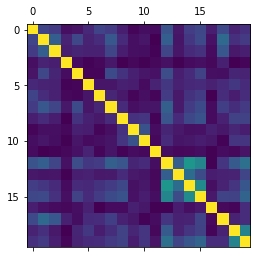

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,0.039167,0.028991,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,0.061266,0.003972,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,0.039874,0.011543,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,0.006121,0.023730,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,0.147294,0.087518,0.062275,0.048736,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,0.114441,0.096991,0.091299,0.009929,0.013804,1.000000,0.061173,0.062914,0.087401,0.077666,0.030678,0.101619,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,0.069151,0.013389,0.041124,0.016950,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,0.121947,0.042192,0.058972,0.057882,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,0.087299,0.125267,0.078046,0.004190,0.147294,0.087401,0.069151,0.121947,1.000000,0.142756,0.153150,0.012392,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,0.019790,0.040555,0.040859,0.023849,0.087518,0.077666,0.013389,0.042192,0.142756,1.000000,0.254342,0.035288,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


In [7]:
# Calculate the correlation between values
correlation = df.corr().abs()
plt.matshow(correlation)
plt.show()
display(correlation)

In [8]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
#split dataset in features and target variable
feature_cols = df.columns.drop("HeartDiseaseorAttack") # We will train using all the data except the Heart disease attack
X = df[feature_cols] # Features
y = df.HeartDiseaseorAttack # Target variable, we want to know the chances of suffering a heart attack
#['HighBP', 'HighChol', 'CholCheck', 'Smoker','Diabetes','HvyAlcoholConsump','GenHlth']


In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.851571533690739


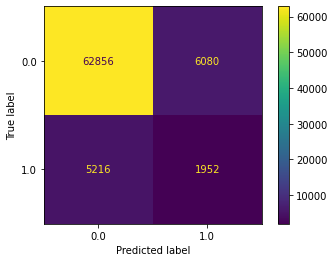

In [13]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [14]:
# El modelo es tan malo que no predice ningun positivo correctamente, por lo tanto ni con un 100% de adherencia reduciriamos el coste
# Una posible solucion a esto es balancear el dataset, ya que hay una gran mayoria de personas que no sufren strokes

In [23]:
df['HeartDiseaseorAttack'].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [24]:

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res,y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8552901292967519


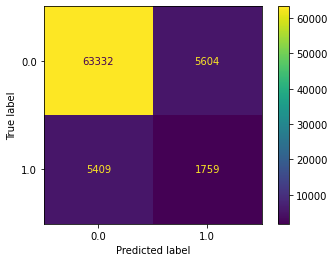

In [27]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


In [28]:
# Estos numeros ya son mas aceptables
# Los importantes son los TP ( nos ahorran dinero ) y los FP ( nos hacen perder dinero ) [ los numeros tienen buena pinta ]
confMatx=metrics.confusion_matrix(y_test, y_pred)
confMatx

array([[63332,  5604],
       [ 5409,  1759]])

In [29]:
def calcularRatioDeAdherencia(tp,fp):
  x = (21.69*tp)/((43.35*tp) + (0.64*fp))
  return x
print(str(calcularRatioDeAdherencia(confMatx[1][1],confMatx[0][1])*100) + " %")


47.78693326249094 %
